# Classificador de SPAM utilizando Machine Learning

### 1) Definição do problema

&emsp;&emsp;Desde que se tem registro, crimes de fraudes sempre estiveram presentes na história da humanidade. Com o avanço e democratização da internet, seria inevitável que criminosos começassem a surgir no meio virtual, os chamados cibercriminosos.<br/>
Segundo o site phishing.org, fraudes na internet sempre existiram, porém o termo phishing começou a se popularizar devido a crackers que, em 1995, utilizavam de técnicas para roubar senhas de usuários do principal provedor de internet dos estados unidos na época AOL, para, em seguida, utilizar algoritmos para criar números de cartões aleatórios.<br/>
Embora os ataques de cartões de créditos falsos tenham acabado, os Phishers continuaram suas práticas se passando por funcionários da AOL, para enviar mensagens instantâneas e e-mails para usuários do sistema com o intuito de obter informações do faturamento dos usuários, logo, muitas pessoas caiam pois não existia nada parecido com esse golpe anteriormente.
<br/><br/>
**O que é phishing?**<br/>
&emsp;&emsp;Segundo o Site oficial do Avast3, Phishing pode ser definido como "uma maneira desonesta que cibercriminosos usam para enganar você a revelar informações pessoais como senhas ou cartão de crédito, CPF e número de contas bancárias.". Ou seja, phishing é um tipo de ataque realizado por cibercriminosos com o intuito não de atacar sistemas da computação, e sim, as pessoas que estão utilizando esses sistemas, utilizando táticas de engenharia social.
<br/><br/>
**Envio de emails maliciosos**<br/>
&emsp;&emsp;Um dos tipos mais comuns de phishing são o envio de emails falsos que tentam enganar e persuadir o usuário a colocar suas informações pessoais nos formulários e dessa forma roubar os dados do mesmo. Os criminosos fazem esses emails se passando por outras empresas, como por exemplo: Se passando por instituições bancárias, redes sociais, grandes empresas, etc. O usuário então recebe esses emails e acreditam estar informando seus dados para uma empresa séria, mas quando na verdade os dados estão sendo enviados para criminosos.

#### 1.1) Objetivos deste projeto
&emsp;&emsp;Definido o problema, este projeto tem por objetivo, a implementação de um modelo de Machine Learning capaz de dado o texto de entrada, nos dizer se esse texto é uma SPAM (texto malicioso) ou um HAM (text não malicioso).

<span style="color:green">Falar sobre o dataset e aquisição dos dados</span><br/>
<span style="color:green">Citar sobre Processamento de linguagem natural</span><br/>
<span style="color:green">Citar sobre o algoritmo Naive Bayes</span><br/>
<span style="color:aqua">Considerações sobre os resultados obtidos</span><br/>
Link1: https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained#8.-BERT <br/>
Link2: https://www.kaggle.com/code/mariapushkareva/nlp-disaster-tweets-with-glove-and-lstm/notebook <br/>
Link3: https://towardsdatascience.com/how-to-build-your-first-spam-classifier-in-10-steps-fdbf5b1b3870 <br/>
Link4: https://blog.qoda.com.br/spam-classifier-com-python/ <br/>

In [56]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import sent_tokenize, word_tokenize


In [57]:
#Importação e aplicação do estilo que será utilizado para representar os gráficos.
import json
import plotly.io as pio
with open('estilos/dark-petroleum.json', 'r') as f:
    template = json.load(f)

pio.templates['my_theme'] = template

In [58]:
#Carregando os dados
df = pd.read_csv('data/spam.csv', encoding='latin-1')

df = df.dropna(how="any", axis=1)
df.columns = ['target', 'message']

### 2) Análise exploratória dos dados

A primeira etapa do projeto consiste em fazer uma análise exploratória dos dados, vamos fazer uma investigação a respeito da distribuição dos dados, quantidade de registros, verificar se há valores missing.
<br/>
Eu decidi criar uma nova coluna contendo a quantidade de palavras para cada frase, assim temos um valor mais tangível na hora de analisar os dados.

In [59]:
#Criação de uma nova coluna contendo o tamanho em quantidade de palavras de cada frase.
df['message_len'] = df['message'].apply(lambda x: len(x.split(' ')))

In [60]:
print('O conjunto de dados possui {} registros, vamos descobrir mais adiante se essa quantidade é o suficiente para construir uma aplicação robusta e eficaz.'.format(df.shape[0]))

O conjunto de dados possui 5572 registros, vamos descobrir mais adiante se essa quantidade é o suficiente para construir uma aplicação robusta e eficaz.


In [61]:
df.head()

,target,message,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [62]:
print('Distribuição da variável target')
print(df['target'].value_counts())

print('################################\nProporção da variável target')
print(round(df['target'].value_counts() / len(df), 2))

Distribuição da variável target
ham     4825
spam     747
Name: target, dtype: int64
################################
Proporção da variável target
ham     0.87
spam    0.13
Name: target, dtype: float64


In [63]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=[df['target'].value_counts().index[0]], 
    y=[df['target'].value_counts()[0]], 
    text=[df['target'].value_counts()[0]],
    name='Ham'
    ))

fig.add_trace(go.Bar(
    x=[df['target'].value_counts().index[1]], 
    y=[df['target'].value_counts()[1]], 
    text=[df['target'].value_counts()[1]],
    name='Spam'
    ))
    
fig.update_layout(
    title='<span>Quantidade total de emails Ham/Spam</span>', 
    autosize=False,
    width=400,
    height=400,
    yaxis=dict(title='<span>Quantidade</span>'),
    template='my_theme'
    )

In [64]:
df.describe()

,message_len
count,5572.000000
mean,15.606784
std,11.422465
min,1.000000
25%,7.000000
50%,12.000000
75%,23.000000
max,171.000000


In [65]:
ham_df = df.loc[df['target'] == 'ham']['message_len'].value_counts().sort_index()
spam_df = df.loc[df['target'] == 'spam']['message_len'].value_counts().sort_index()

In [66]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ham_df.index, y=ham_df.values, name='Ham', fill='tozeroy'))
fig.add_trace(go.Scatter(x=spam_df.index, y=spam_df.values, name='Spam', fill='tozeroy'))
fig.update_layout(
    title='<span>Quantidade de ocorrências Spam/Ham por quantidade de palavras</span>', 
    autosize=False,
    width=800,
    height=500,
    xaxis=dict(title='<span>Quantidade de ocorrências Spam/Ham</span>'),
    yaxis=dict(title='<span>Quantidade de palavras</span>'),
    template='my_theme'
    )

#fig.update_xaxes(range=[0, 70])



Podemos perceber através do gráfico que os textos que são Spams têm no máximo 100 palavras.<br/><br/>

### 3) Pré processamento dos dados

Agora nós vamos trabalhar para tratar os dados de forma a facilitar e otimizar para que o modelo possa realizar a classificação. Essa etapa é muito importante para reduzir as dimensões do problema.

In [67]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.preprocessing import LabelEncoder

##### 3.1) Limpeza dos textos

A nossa primeira etapa do pré processamento dos dados consiste em tornar os textos mais limpos e livres sujeira. Para isso vamos realizar algumas transformações, sendo: Transformar todo o texto em lowercase, remover textos entre colchetes e <>, remover links, pontuações e palavras que contenham números. Vamos utilizar as expressões regulares para realizar esse processamento.

In [68]:
#Documentação sobre Regex: https://docs.pexip.com/admin/regex_reference.htm

def limparTexto(texto):
    #Vamos transformar o texto em lowercase, remover textos entre colchetes, links, pontuações e palavras que contenham números.
    texto = str(texto).lower()
    texto = re.sub('\[.*?\]', '', texto) #Removendo textos entre colchetes
    texto = re.sub('<.*?>+', '', texto)  # Remove textos entre <>
    texto = re.sub('https?://\S+|www\.\S+', '', texto) #Removendo links
    texto = re.sub('[%s]' % re.escape(string.punctuation), '', texto) #remove pontuação
    texto = re.sub('\n', '', texto) #Removendo '\n'
    texto = re.sub('\w*\d\w*', '', texto) #Remove palavras contendo dígitos no meio.
    return texto

In [69]:
df['message_clean'] = df['message'].apply(limparTexto)
df.head()

,target,message,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,11,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah i dont think he goes to usf he lives aroun...


##### 3.2) Stopwords
Stopwords são palavras comuns que normalmente não contribuem para o significado de uma frase, pelo menos com relação ao propósito da informação e do processamento da linguagem natural. São palavras como "The" e "a" ((em inglês) ou "O/A" e "Um/Uma" ((em português). Muitos mecanismos de busca filtram estas palavras (stopwords), como forma de economizar espaço em seus índices de pesquisa.<br/>
Vamos removê-las no nosso projeto:

In [70]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def removerStopwords(texto):
    texto = ' '.join(palavra for palavra in texto.split(' ') if palavra not in stop_words)
    return texto

df['message_clean'] = df['message_clean'].apply(removerStopwords)
df.head()

,target,message,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry wkly comp win fa cup final tkts m...
3,ham,U dun say so early hor... U c already then say...,11,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think goes usf lives around though


##### 3.3) Stemming/Lematization
**Stemming** é a técnica de remover sufixos e prefixos de uma palavra, chamada stem. Por exemplo, o stem da palavra cooking é cook. Um bom algoritmo sabe que "ing" é um sufixo e pode ser removido. Stemming é muito usado em mecanismos de buscas para indexação de palavras. Ao invés de armazenar todas as formas de uma palavras, um mecamismo de busca armazena apenas o stem da palavra, reduzindo o tamanho do índice e aumentando a performance do processo de busca.

**Lemmatization** geralmente se refere a fazer as coisas corretamente com o uso de um vocabulário e análise morfológica de palavras, normalmente visando remover apenas terminações flexionais e retornar a forma base e de dicionário de uma palavra. Por exemplo: was -> (to) be; better -> good; meeting -> meeting.

**_Algoritmos para Stemming_**
1. **PorterStemmer**: É conhecido por sua simplicidade e velocidade. O algoritmo simplesmente remove a letra que transforma a palavra em plural, por exemplo: 's' em "cats". Este é um sufixo adicionado a cat para torná-lo plural. Mas se você olhar para 'trouble', 'troubling' e 'troubling' eles derivam para 'trouble' porque o algoritmo de PorterStemmer não segue linguística e sim um conjunto de 05 regras para diferentes casos que são aplicadas em fases (passo a passo) para gerar hastes. Esta é a razão pela qual o PorterStemmer não costuma gerar radicais que são palavras reais em inglês. Ele não mantém uma tabela de pesquisa para os radicais reais da palavra, mas aplica regras algorítmicas para gerar os radicais. Ele usa as regras para decidir se é sensato remover um sufixo.
2. **SnowballStemmers**: Pode-se gerar seu próprio conjunto de regras para qualquer linguagem e é por isso que o Python nltk introduziu SnowballStemmers que são usados para criar Stemmers não ingleses.
3. **LancasterStemmer**: (lematizador Paice-Husk) é um algoritmo iterativo com regras salvas externamente. Uma tabela contendo cerca de 120 regras indexadas pela última letra de um sufixo. Em cada iteração, ele tenta encontrar uma regra aplicável pelo último caractere da palavra. Cada regra especifica uma exclusão ou substituição de um final. Se não houver tal regra, ela termina. Ele também termina se uma palavra começar com uma vogal e houver apenas duas letras restantes ou se uma palavra começar com uma consoante e houver apenas três caracteres restantes. Caso contrário, a regra é aplicada e o processo se repete.

In [71]:
stemmer = SnowballStemmer("english")

def stemm_texto(texto):
    texto = ' '.join(stemmer.stem(palavra) for palavra in texto.split(' '))
    return texto

df['message_clean'] = df['message_clean'].apply(stemm_texto)
df.head()

,target,message,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entri wkli comp win fa cup final tkts m...
3,ham,U dun say so early hor... U c already then say...,11,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think goe usf live around though


##### 3.4) Target Encoding

Vamos converter nosso atributo target para o tipo categórico. Vamos mapear da seguinte forma: ham -> 0, spam -> 1. Dessa forma o algoritmo vai conseguir trabalhar com a variável sendo numérica. Para isso vamos utilizar a função LabelEnoder do Scikit-Learn.

In [72]:
le = LabelEncoder()
le.fit(df['target'])

df['target_encoded'] = le.transform(df['target'])
df.head()

,target,message,message_len,message_clean,target_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazi avail bugi n great world...,0
1,ham,Ok lar... Joking wif u oni...,6,ok lar joke wif oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entri wkli comp win fa cup final tkts m...,1
3,ham,U dun say so early hor... U c already then say...,11,dun say earli hor alreadi say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think goe usf live around though,0


##### 3.5) Visualização dos tokens

Agora vamos criar uma nuvem de palavras para ver as principais ocorrências em cada tipo de mensagem.

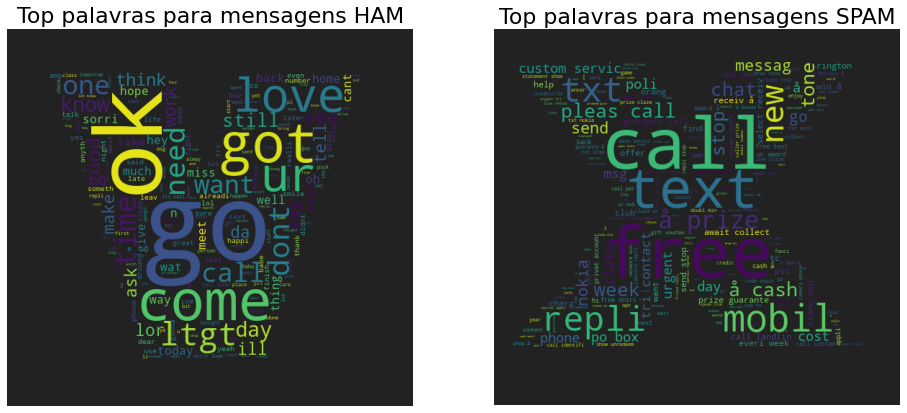

In [73]:
maskHam = np.array(Image.open('assets/ham.png'))
wcHam = WordCloud(
    background_color='#222', 
    max_words=200, 
    mask=maskHam,
)

maskSpam = np.array(Image.open('assets/spam.png'))
wcSpam = WordCloud(
    background_color='#222', 
    max_words=200, 
    mask=maskSpam,
)

wcHam.generate(' '.join(text for text in df.loc[df['target'] == 'ham', 'message_clean']))
wcSpam.generate(' '.join(text for text in df.loc[df['target'] == 'spam', 'message_clean']))

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].set_title('Top palavras para mensagens HAM', fontdict={'size': 22})
ax[0].imshow(wcHam)
ax[0].axis('off')

ax[1].set_title('Top palavras para mensagens SPAM', fontdict={'size': 22})
ax[1].imshow(wcSpam)
ax[1].axis('off')

plt.show()

**Visualização das principais palavras com barchat**<br/>

A nuvem de palavras é bonita e agradável de ver, mas não é a melhor maneira de apresentar quais são as principais palavras para cada tipo de mensagem. Por isso, vamos criar um barchart para visualizar as informações de maneira mais limpa e profissional. Vamos visualizar as 15 principais ocorrências nas mensagens HAM e SPAM.

In [74]:
lista_ham = df.loc[df['target'] == 'ham', 'message_clean']
ham_text = ' '.join(frase for frase in lista_ham)
ham_word = word_tokenize(ham_text)
ham_df = pd.DataFrame(ham_word).value_counts()[0:15]

ham_df = pd.DataFrame(ham_df, columns=['quantidade'])
ham_df.reset_index(inplace=True)
ham_df.columns = ['palavra', 'quantidade']

lista_spam = df.loc[df['target'] == 'spam', 'message_clean']
spam_text = ' '.join(frase for frase in lista_spam)
spam_word = word_tokenize(spam_text)
spam_df = pd.DataFrame(spam_word).value_counts()[0:15]

spam_df = pd.DataFrame(spam_df, columns=['quantidade'])
spam_df.reset_index(inplace=True)
spam_df.columns = ['palavra', 'quantidade']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=ham_df['palavra'], 
    y=ham_df['quantidade'], 
    #text=[df['target'].value_counts()[1]],
    name='Ham'
    ))

fig.add_trace(go.Bar(
    x=spam_df['palavra'], 
    y=spam_df['quantidade'], 
    #text=[df['target'].value_counts()[1]],
    name='Spam'
    ))
#fig.add_trace(go.Scatter(x=spam_df.index, y=spam_df.values, name='Spam', fill='tozeroy'))
fig.update_layout(
    title='<span>Principais palavras de cada categoria Ham/Spam</span>', 
    autosize=False,
    width=1000,
    height=500,
    xaxis=dict(title='<span>Palavras</span>'),
    yaxis=dict(title='<span>Quantidade de ocorrências</span>'),
    template='my_theme'
    )

### 4) Vetorization

Atualmente, temos as mensagens como listas de tokens (também conhecidas como lemas) e agora precisamos converter cada uma dessas mensagens em um vetor com o qual os modelos de algoritmo do Scikit Learn possam trabalhar.<br/>
Faremos isso em três etapas usando o modelo bag-of-words:
1. Contar quantas vezes uma palavra ocorre em cada mensagem (conhecida como *term frequency*)
2. Pesar as contagens, para que os tokens frequentes tenham um peso menor (*inverse document frequency*)
3. Normalizar os vetores para o comprimento da unidade, para abstrair do comprimento do texto original (*L2 norm*)

Vamos para a primeira etapa:<br/>
Cada vetor terá tantas dimensões quantas forem as palavras únicas no corpus SMS. Primeiro usaremos o CountVectorizer do Scikit Learn. Este modelo converterá uma coleção de documentos de texto em uma matriz de contagens de token.<br/>
Podemos imaginar isso como uma matriz bidimensional. Onde a dimensão 1 é todo o vocabulário (1 linha por palavra) e a outra dimensão são os documentos reais, neste casa uma coluna por mensagem de texto.



In [75]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [76]:
#Vamos jogar nosso atributo message_clean e nossa variável target em arrays x e y
x = df['message_clean']
y = df['target_encoded']

print(len(x), len(y))

5572 5572


In [77]:
#Vamos dividir nosso conjunto de dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

4179 4179
1393 1393


In [78]:
# Vamos instanciar e treinar nosso CountVectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [113]:
#Agora nós utilizar o modelo treinado para criar nossa document-term matrix para os arrays de treino e teste.
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

##### 4.1) Refinando o CountVectorizer

O CountVectorizer tem uma serie de parâmetros que devemos levar em consideração:
* **stop_words**: Como o CountVectorizer apenas conta as ocorrências de cada palavra em seu vocabulário, palavras extremamente comuns como 'o', 'e' e etc, se tornarão recursos importantes enquanto adicionam significado ao texto. O modelo muitas vezes pode ser melhorado se não levarmos em consideração essas palavras. Stop words são uma lista de palavras que não desejamos levar como recursos.
* **ngram_range**: Um n-gram é apenas uma sequência de *n* palavras seguidas. Por exemplo, a frase 'I am Groot' contém os 2 grams 'I am' e 'am Groot'. A frase é em si um 3 grams. Definindo ngram_range = (a,b) onde a é o mínimo e b é o tamanho máximo de ngrams que você deseja incluir em suas features. O ngram_range padrão é (1,1).
* **min_df, max_df**: Estas são as frequências mínima e máxima do documento que as palavras/n-grams devem ter para serem usadas como features. Se qualquer um desses parâmetros for definido como inteiros, eles serão usados como limites no número de documentos em que cada recurso deve estar para ser considerado recurso. Se qualquer um for definido como float, esse número será interpretado como uma frequência em vez de um limite numérico. O padrão min_df é 1 (int) e o padrão max_df é 1.0 (float).
* **max_features**: Esse parâmetro é bastante auto-explicativo. O CountVectorizer escolherá as palavras/características que ocorrem com mais frequência para estar em seu vocabulário e descartará todo o resto.
<br/>

Dito isso, agora vamos adicionar esses parâmetros ao nosso modelo CountVectorizer.

In [105]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.7, max_features=100)
vect_tunned.fit(x_train)

#Agora nós utilizar o modelo treinado para criar nossa document-term matrix para os arrays de treino e teste.
x_train_dtm = vect_tunned.transform(x_train)
x_test_dtm = vect_tunned.transform(x_test)

##### 4.2) TF-IDF

Na recuperação de informação, tf-idf, TF-IDF, ou TFIDF, abreviação do termo *Term Frequency-inverse document frequency*, é uma estatística numérica que se destina a refletir a importância de uma palavra para um documento em uma coleção ou corpus. Como fator de ponderação em buscas de recuperação de informações, mineração de textos e modelagem de usuários. O valor tf-idf aumenta proporcionalmente ao número de vezes que uma palavra aparece no documento e é compensado pelo número de documentos no corpus que contêm a palavra, o que ajuda a ajustar o fato de que algumas palavras aparecem com mais frequência em geral.

In [114]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(x_train_dtm)


x_train_tfidf = tfidf_transformer.transform(x_train_dtm)
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

### 5) Modelagem

Agora vamos partir para a parte mais glamourosa do trabalho de um cientista de dados, criar o modelo que realizará as previsões. Eu decidi dividir em dois capítulos para ficar mais organizado. O primeiro capítulo vamos criar modelos utilizando o Naive Bayes e também o XGBoost. Já no próximo capítulo vamos criar uma rede neural recorrente.

In [130]:
import plotly.figure_factory as ff
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb

Antes de mais nada, vou criar uma função para gerar o gráfico contendo a confusion matrix, para visualizar os resultados obtidos de maneira mais personalizada.

In [95]:
x_axes = ['Ham', 'Spam']
y_axes =  ['Spam', 'Ham']

def conf_matrix(z, x=x_axes, y=y_axes):
    
    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(
        title_text='<b>Confusion matrix</b>',
        xaxis = dict(title='Valores previstos'),
        yaxis = dict(title='Valores reais'),
        width=600,
        height=400,
        template = 'my_theme'
        )

    # add colorbar
    fig['data'][0]['showscale'] = True
    
    return fig

##### 6.1) Naive Bayes

Em estatística, os classificadores Naive Bayes são uma família de "classificadores probabilísticos" simples baseados na aplicação do teorema de Bayes com suposições de independência fortes (ingênuas) entre os recursos. Eles estão entre os modelos de rede bayesiana mais simples, mas juntamente com a estimativa de densidade do kernel, eles podem atingir níveis de precisão mais altos.<br/>

Os classificadores Naive Bayes são altamente escaláveis, exigindo uma série de parâmetros lineares no número de variáveis (características/preditores) em um problema de aprendizado. O treinamento de probabilidade máxima pode ser feito avaliando uma expressão de forma fechada, que leva tempo linear, em vez de uma aproximação iterativa cara, como usada para muitos outros tipos de classificadores.

In [162]:
# Create o modelo Multinomial Naive Bayes
nb = MultinomialNB()

# Treinamento do modelo
nb.fit(x_train_tfidf, y_train)

# Realização das previsões
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

#Visualizando os resultados
print('Os dados de treinos obtiveram a acurácia de: {}%'.format((round(metrics.accuracy_score(y_test, y_pred_class) * 100, 2))))

# Calculate AUC
print('Visualizando a métrica AUC: {}'.format(round(metrics.roc_auc_score(y_test, y_pred_prob), 2)))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

Os dados de treinos obtiveram a acurácia de: 86.22%
Visualizando a métrica AUC: 0.52


##### 6.2) Naive Bayes com pipeline de execução

Vamos criar o mesmo modelo que foi criado anteriormente, mas dessa vez vamos empilhar os passos que realizamos etapa por etapa em uma única execução. A classe Pipeline ser justamente para isso, primeiro vamos realizar o CountVectorizer, depois TfidfTransformer e por fim, a aplicação do modelo para treinamento.

In [145]:
pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

#Treinando o modelo
pipe.fit(x_train, y_train)

#Realizando as previsões
y_pred_class = pipe.predict(x_test)

#Visualizando os resultados
print('Os dados de treinos obtiveram a acurácia de: {}%'.format((round(metrics.accuracy_score(y_test, y_pred_class) * 100, 2))))
conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

Os dados de treinos obtiveram a acurácia de: 95.98%


##### 6.3) XGBoost

O XGBoost é um algoritmo de aprendizado de máquina, baseado em árvore de decisão e que utiliza uma estrutura de Gradient boosting. XGBoost e Gradient Boosting Machines (GBMs) são ambos métodos de árvore que aplicam o princípio de impulsionar weak learners usando a arquitetura de gradiente descendente. No entanto, o XGBoost aprimora a estrutura básica do GBM por meio da otimização de sistemas e aprimoramentos algorítmicos.<br/>

Em problemas de previsão envolvendo dados não estruturados, como imagens, textos e vídeos, as redes neurais artificiais tendem a superar vários outros algoritmos ou frameworks. No entanto, quando se trata de dados estruturados/tabulares, algoritmos baseados em árvore de decisão são considerados os melhores da sua classe no momento<br/>

Desde a sua criação, o algoritmo XGBoost tem sido o mais vitorioso no Kaggle. Além disso, também tem sido utilizado em várias aplicações de ponta na indústria. Por isso decidi trazê-lo para este projeto, vamos implementar utilizando o Pipeline de execuções também.

In [146]:
pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc',
        # colsample_bytree=0.8,
        # subsample=0.7,
        # min_child_weight=5,
    ))
])

# Treiamento do modelo
pipe.fit(x_train, y_train)

# Realização das previsões
y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

#Visualizando os resultados
print('Acurácia do treinamento: {}%'.format(round(metrics.accuracy_score(y_train, y_pred_train) * 100, 2)))
print('Acurácia dos testes: {}%'.format(round(metrics.accuracy_score(y_test, y_pred_class) * 100, 2)))
conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

Acurácia do treinamento: 98.35%
Acurácia dos testes: 96.55%


### 7) LSTM

As redes neurais do tipo Long Short Term Memory (memória de curto e longo prazo) são um tipo especial de rede neural recorrente e capazes de aprender conexões em sequências de informação. Dentre as principais aplicações das redes neurais Long Short Term Memory destacam-se: processamento de tarefas de linguagem natural; processamento de áudio; e processamento de uma sequência de frames de vídeo.<br/>

LSTMs, assim como todas as arquiteturas de redes neurais artificiais, são bioinspiradas. Ou seja, elas funcionam de forma análoga a algum processo biológico. Como vimos em outro post aqui do blog, as redes neurais convolucionais são inspiradas no funcionamento do córtex visual cerebral. Já LSTMs utilizam como base o funcionamento da memória. Logo, são divididas em dois tipos: memória de curto prazo e memória de longo prazo.<br/>

* **Memória de curto prazo**: atua no momento da aquisição da informação. Na memória de curto prazo, a informação é retida por alguns segundos e, então, destinada para armazenamento por períodos mais longos ou descartada.
* **Memória de longo prazo**: retém a informação, permitindo sua recuperação ou evocação a posteriori. É na memória de longo prazo que todo nosso conhecimento fica "armazenado".

Em síntese, a arquitetura de LSTMs consiste em um conjunto de células de memória conectadas de forma recorrente que revolucionou e melhorou o desempenho de ferramentas como o reconhecimento de fala e as traduções automáticas do Google e as respostas da Alexa da Amazon.

**Arquitetura da Rede Neural LSTM**<br/>
As células ou blocos de memória da LSTM (Figura 1) retêm e manipulam informações por meio de portões (gates). Eles, por sua vez, controlam a passagem de informações entre as células. Aliás, LSTMs possuem três tipos de portões. São eles:
* **Forget Gate (portão de esquecimento)**: decide quais informações devem ser descartadas, ou seja, esquecidas pela célula de memória.
* **Input Gate (portão de entrada)**: responsável por adicionar informações ao estado da célula de memória.
* **Output Gate (portão de saída)**: extrai as informações úteis do estado da célula de memória atual, direcionando-as para a célula de memória seguinte.

Todos os portões utilizam funções matemáticas específicas que possibilitam a manipulação da informação dentro da célula de memória de acordo com sua tarefa (esquecimento, entrada ou saída).<br/>

<div style='text-align: center;'><img src='assets/lstm.png'><p style='font-style:italic'>Fonte: Long Short Term Memory: redes neurais artificiais que são capazes de ler, ouvir e ver, 2021</p></div>

Além dos portões, a célula de memória de uma LSTM possui duas entradas, representadas por Xt e ht-1, onde:
* Xt representa a entrada no momento específico;
* e ht-1 a saída da célula anterior.

A memória de longo prazo ou estado da célula possui conexão com todos os portões, conforme exibido na Figura 1. A saída da célula, utilizada como input para a célula subsequente, é representada por Zt.<br/>

Por fim, a célula contém ainda um portão de modulação da entrada (input modulation gate), responsável por gerar um valor a partir da entrada atual e, também, da saída da célula anterior.

**Referência**<br/>
* MATSUMOTO, Fernando et al. Redes Neurais | LSTM, *Como lidar com perda de memória com Machine Learning*. 2019. Disponível em: <https://medium.com/turing-talks/turing-talks-27-modelos-de-predição-lstm-df85d87ad210> </br>

* PASSOS, Bianka Tallita. Long Short Term Memory: redes neurais artificiais que são capazes de ler, ouvir e ver. 2021. Disponível em: <https://ateliware.com/blog/long-short-term-memory><br/>


In [147]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

##### 7.1) Tokenization

Precisamos realizar **tokenização** - o processamento de segmentação de texto em frases de palavras. O benefício da tokenização é que ela coloca o texto em um formato mais fácil de converter em números brutos, que podem ser usados para processamento.

In [148]:
texts = df['message_clean']
target = df['target_encoded']

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

6769

##### 7.2) Pad Sequences

O método pad_sequences transforma uma lista (de comprimento num_samples) de sequências (listas de inteiros) em uma matriz Numpy 2D de forma (num_samples, num_timesteps). num_timesteps é o argumento maxlen, se fornecido, ou o comprimento da sequência mais longa na lista.

In [149]:
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(texts), 
    length_long_sentence, 
    padding='post'
)

train_padded_sentences

array([[   2, 3199,  276, ...,    0,    0,    0],
       [   8,  239,  532, ...,    0,    0,    0],
       [   9,  361,  591, ...,    0,    0,    0],
       ...,
       [6767, 1007, 6768, ...,    0,    0,    0],
       [ 139, 1257, 1612, ...,    0,    0,    0],
       [1998,  382,  171, ...,    0,    0,    0]])

##### 7.3) GloVe

O método GloVe se baseia em uma ideia importante,
> Você pode derivar relações semânticas entre palavras da matriz de co-ocorrência.

Para obter uma representação vetorial para as palavras, podemos usar um algoritmo de aprendizado não supervisionado chamado GloVe (Global Vectors for Word Representation), que se concentra em co-ocorrências de palavras em todo o corpus. Seus embeddings estão relacionados às probabilidades de duas palavras aparecerem juntas.<br/>
Word embeddings são basicamente uma forma de representação de palavras que conecta o entendimento humano da linguagem ao de uma máquina. Eles aprenderam representações de texto em um espaço n-dimensional onde palavras que têm o mesmo significado têm uma representação semelhante. O que significa que duas palavras semelhantes são representadas por vetores quase semelhantes que estão muito próximos em um espaço vetorial.<br/>
Assim, ao usar a incorporação de palavras, todas as palavras individuais são representadas como vetores de valor real em um espaço vetorial predefinido. Cada palavra é mapeada para um vetor e os valores do vetor são aprendidos de uma maneira que se assemelha a uma rede neural.

In [150]:
embeddings_dictionary = dict()
embedding_dim = 100

# Carregando GloVe 100D embeddings
with open('lib/glove.6B.100d.txt', encoding="utf8") as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

In [151]:
#Agora vamos carregar vetores de embeddings dessas palavras que aparecem no dicionário Glove. Outros serão inicializados em 0.
embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [152]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.57832998, -0.0036551 ,  0.34658   , ...,  0.070204  ,
         0.44509   ,  0.24147999],
       [-0.078894  ,  0.46160001,  0.57779002, ...,  0.26352   ,
         0.59397   ,  0.26741001],
       ...,
       [ 0.63009   , -0.036992  ,  0.24052   , ...,  0.10029   ,
         0.056822  ,  0.25018999],
       [-0.12002   , -1.23870003, -0.23303001, ...,  0.13658001,
        -0.61848003,  0.049843  ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

##### 7.4) Criação do modelo

In [153]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences, 
    target, 
    test_size=0.25
)

In [154]:
def glove_lstm():
    model = Sequential()
    
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0], 
        output_dim=embedding_matrix.shape[1], 
        weights = [embedding_matrix], 
        input_length=length_long_sentence
    ))
    
    model.add(Bidirectional(LSTM(
        length_long_sentence, 
        return_sequences = True, 
        recurrent_dropout=0.2
    )))
    
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model = glove_lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 100)           676900    
                                                                 
 bidirectional (Bidirectiona  (None, 80, 160)          115840    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 160)              0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 160)              640       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                        

In [155]:
# Carregando e relizando a previsão
model = glove_lstm()

checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model.fit(
    X_train, 
    y_train, 
    epochs = 7,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/7
131/131 [==============================] - ETA: 0s - loss: 0.2930 - accuracy: 0.8871
Epoch 1: val_loss improved from inf to 0.28635, saving model to model.h5
131/131 [==============================] - 229s 2s/step - loss: 0.2930 - accuracy: 0.8871 - val_loss: 0.2864 - val_accuracy: 0.9598 - lr: 0.0010
Epoch 2/7
131/131 [==============================] - ETA: 0s - loss: 0.1648 - accuracy: 0.9459
Epoch 2: val_loss improved from 0.28635 to 0.12162, saving model to model.h5
131/131 [==============================] - 194s 1s/step - loss: 0.1648 - accuracy: 0.9459 - val_loss: 0.1216 - val_accuracy: 0.9598 - lr: 0.0010
Epoch 3/7
131/131 [==============================] - ETA: 0s - loss: 0.1316 - accuracy: 0.9598
Epoch 3: val_loss improved from 0.12162 to 0.08719, saving model to model.h5
131/131 [==============================] - 195s 1s/step - loss: 0.1316 - accuracy: 0.9598 - val_loss: 0.0872 - val_accuracy: 0.9756 - lr: 0.0010
Epoch 4/7
131/131 [==============================] - 

In [156]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

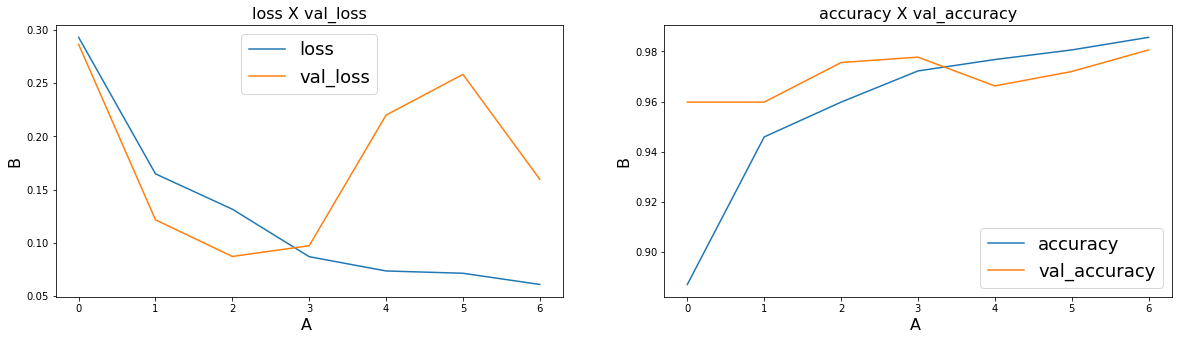

In [157]:
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [159]:
y_preds = (model.predict(X_test) > 0.5).astype("int32")
print('Os dados de treinos obtiveram a acurácia de: {}%'.format((round(metrics.accuracy_score(y_test, y_preds) * 100, 2))))
conf_matrix(metrics.confusion_matrix(y_test, y_preds))

Os dados de treinos obtiveram a acurácia de: 98.06%


### 8) BERT

A técnica BERT (Bidirectional Encoder Representations from Transformers) é o que há de mais moderno no campo de Redes Neurais para processamento de linguagem natural. O algoritmo foid desenvolvido pela equipe do Google e causou uma agitação na comunidade de aprendizado de máquina ao apresentar resultados de última geração em uma ampla variedade de tarefas de NLP (Processamento de Linguagem Natural), incluindo respostas automáticas ao banco de dados de perguntas (SQuAD v1.1), inferência de linguagem natural (MNLI) e outras tarefas. <br/>

O BERT faz uso do Transformer, um mecanismo de atenção que aprende as relações contextuais entre palavras (ou subpalavras) em um texto. Em sua forma original, o Transformer inclui dois mecanismos separados – um codificador que lê a entrada de texto e um decodificador que produz uma previsão para a tarefa. Como o objetivo do BERT é gerar um modelo de linguagem, apenas o mecanismo do codificador é necessário. <br/>

Os resultados do artigo de publicação do BERT mostram que um modelo de linguagem treinado bidirecionalmente pode ter um senso mais profundo de contexto e fluxo de linguagem do que modelos de linguagem de direção única, isto é, da esquerda para a direita. No artigo, os pesquisadores detalham uma nova técnica chamada Masked LM (MLM), que permite o treinamento bidirecional em modelos nos quais antes era impossível. <br/>

Ao contrário dos modelos direcionais, que lêem a entrada de texto sequencialmente (da esquerda para a direita ou da direita para a esquerda), o codificador Transformer lê toda a sequência de palavras de uma vez. Portanto, é considerado bidirecional, embora seja mais preciso dizer que é não direcional. Esta característica permite que o modelo aprenda o contexto de uma palavra com base em todos os seus arredores (esquerdo e direito da palavra). <br/>

O gráfico abaixo é uma descrição de alto nível do codificador Transformer. A entrada é uma sequência de tokens, que são primeiro incorporados em vetores e depois processados ​​na rede neural. A saída é uma sequência de vetores de tamanho H, em que cada vetor corresponde a um token de entrada com o mesmo índice.<br/>

Ao treinar modelos de linguagem, existe o desafio de definir uma meta de previsão. Muitos modelos prevêem a próxima palavra em uma sequência (por exemplo, “A criança voltou para casa de ___”), uma abordagem direcional que limita inerentemente o aprendizado do contexto.<br/>

Para superar esse desafio, o BERT usa duas estratégias de treinamento: Masked LM (MLM) e Next Sentence Prediction (NSP).
<div style='text-align: center;'><img src='assets/bert.png'><p style='font-style:italic'>Fonte: BERT Explained: State of the art language model for NLP</p></div>

**Referência**
* HOREV, Rani. *BERT Explained: State of the art language model for NLP*. 2018. Disponível em: <https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270> 

In [177]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

from tqdm.notebook import tqdm
from tokenizers import BertWordPieceTokenizer

import transformers
from transformers import BertTokenizer
from transformers import TFBertModel

Link par ler posteriormente: https://towardsdatascience.com/how-to-use-bert-from-the-hugging-face-transformer-library-d373a22b0209
<br/>
Sei lá, vai que eu queira ler isso:
https://ele.ufes.br/sites/engenhariaeletrica.ufes.br/files/field/anexo/projeto_de_graduacao_-_rafael_costa_-_final_-_revisado.pdf

O BERT Tokenizer é um tokenizer que funciona com o BERT. Possui muitas funcionalidades para qualquer tipo de tarefa de tokenização. Vamos utilizar um modelo pré treinado pelos próprios desenvolvedores do BERT.

In [207]:
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')

def bert_encode(data, maximum_length) :
    input_ids = []
    attention_masks = []

    for text in data:
        encoded = tokenizer.encode_plus(
            text, 
            add_special_tokens=True,
            max_length=maximum_length,
            padding=True,
            truncation=True,
            return_attention_mask=True,
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
        
    return np.array(input_ids, dtype='object'), np.array(attention_masks, dtype='object')

In [208]:
texts = df['message_clean']
target = df['target_encoded']

train_input_ids, train_attention_masks = bert_encode(texts,60)

In [181]:
def create_model(bert_model):
    
    input_ids = tf.keras.Input(shape=(60,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(60,),dtype='int32')

    output = bert_model([input_ids,attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(32,activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(1,activation='sigmoid')(output)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [182]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
model = create_model(bert_model)
model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 tf_bert_model_1 (TFBertModel)  TFBaseModelOutputWi  109482240   ['input_3[0][0]',                
                                thPoolingAndCrossAt               'input_4[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 60,                                          

In [ ]:
history = model.fit(
    [train_input_ids, train_attention_masks],
    target,
    validation_split=0.2, 
    epochs=3,
    batch_size=10
)

In [ ]:
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [ ]:
x_ids_test = train_input_ids[0:2000]
x_attention_masks = train_attention_masks[0:2000]
y_target = target[0:2000]

y_preds = (model.predict([x_ids_test, x_attention_masks]) > 0.5).astype("int32")
conf_matrix(metrics.confusion_matrix(y_target, y_preds))


In [ ]:
print('Acurácia do modelo: {}'.format(metrics.accuracy_score(y_target, y_preds)))

### 6) Considerações finais